In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
import collections
from scipy.optimize import curve_fit
from statsmodels.formula.api import ols
import math
from csv import writer
import csv

In [2]:
G = nx.read_edgelist('facebook_combined.txt', create_using = nx.Graph(), nodetype = int)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


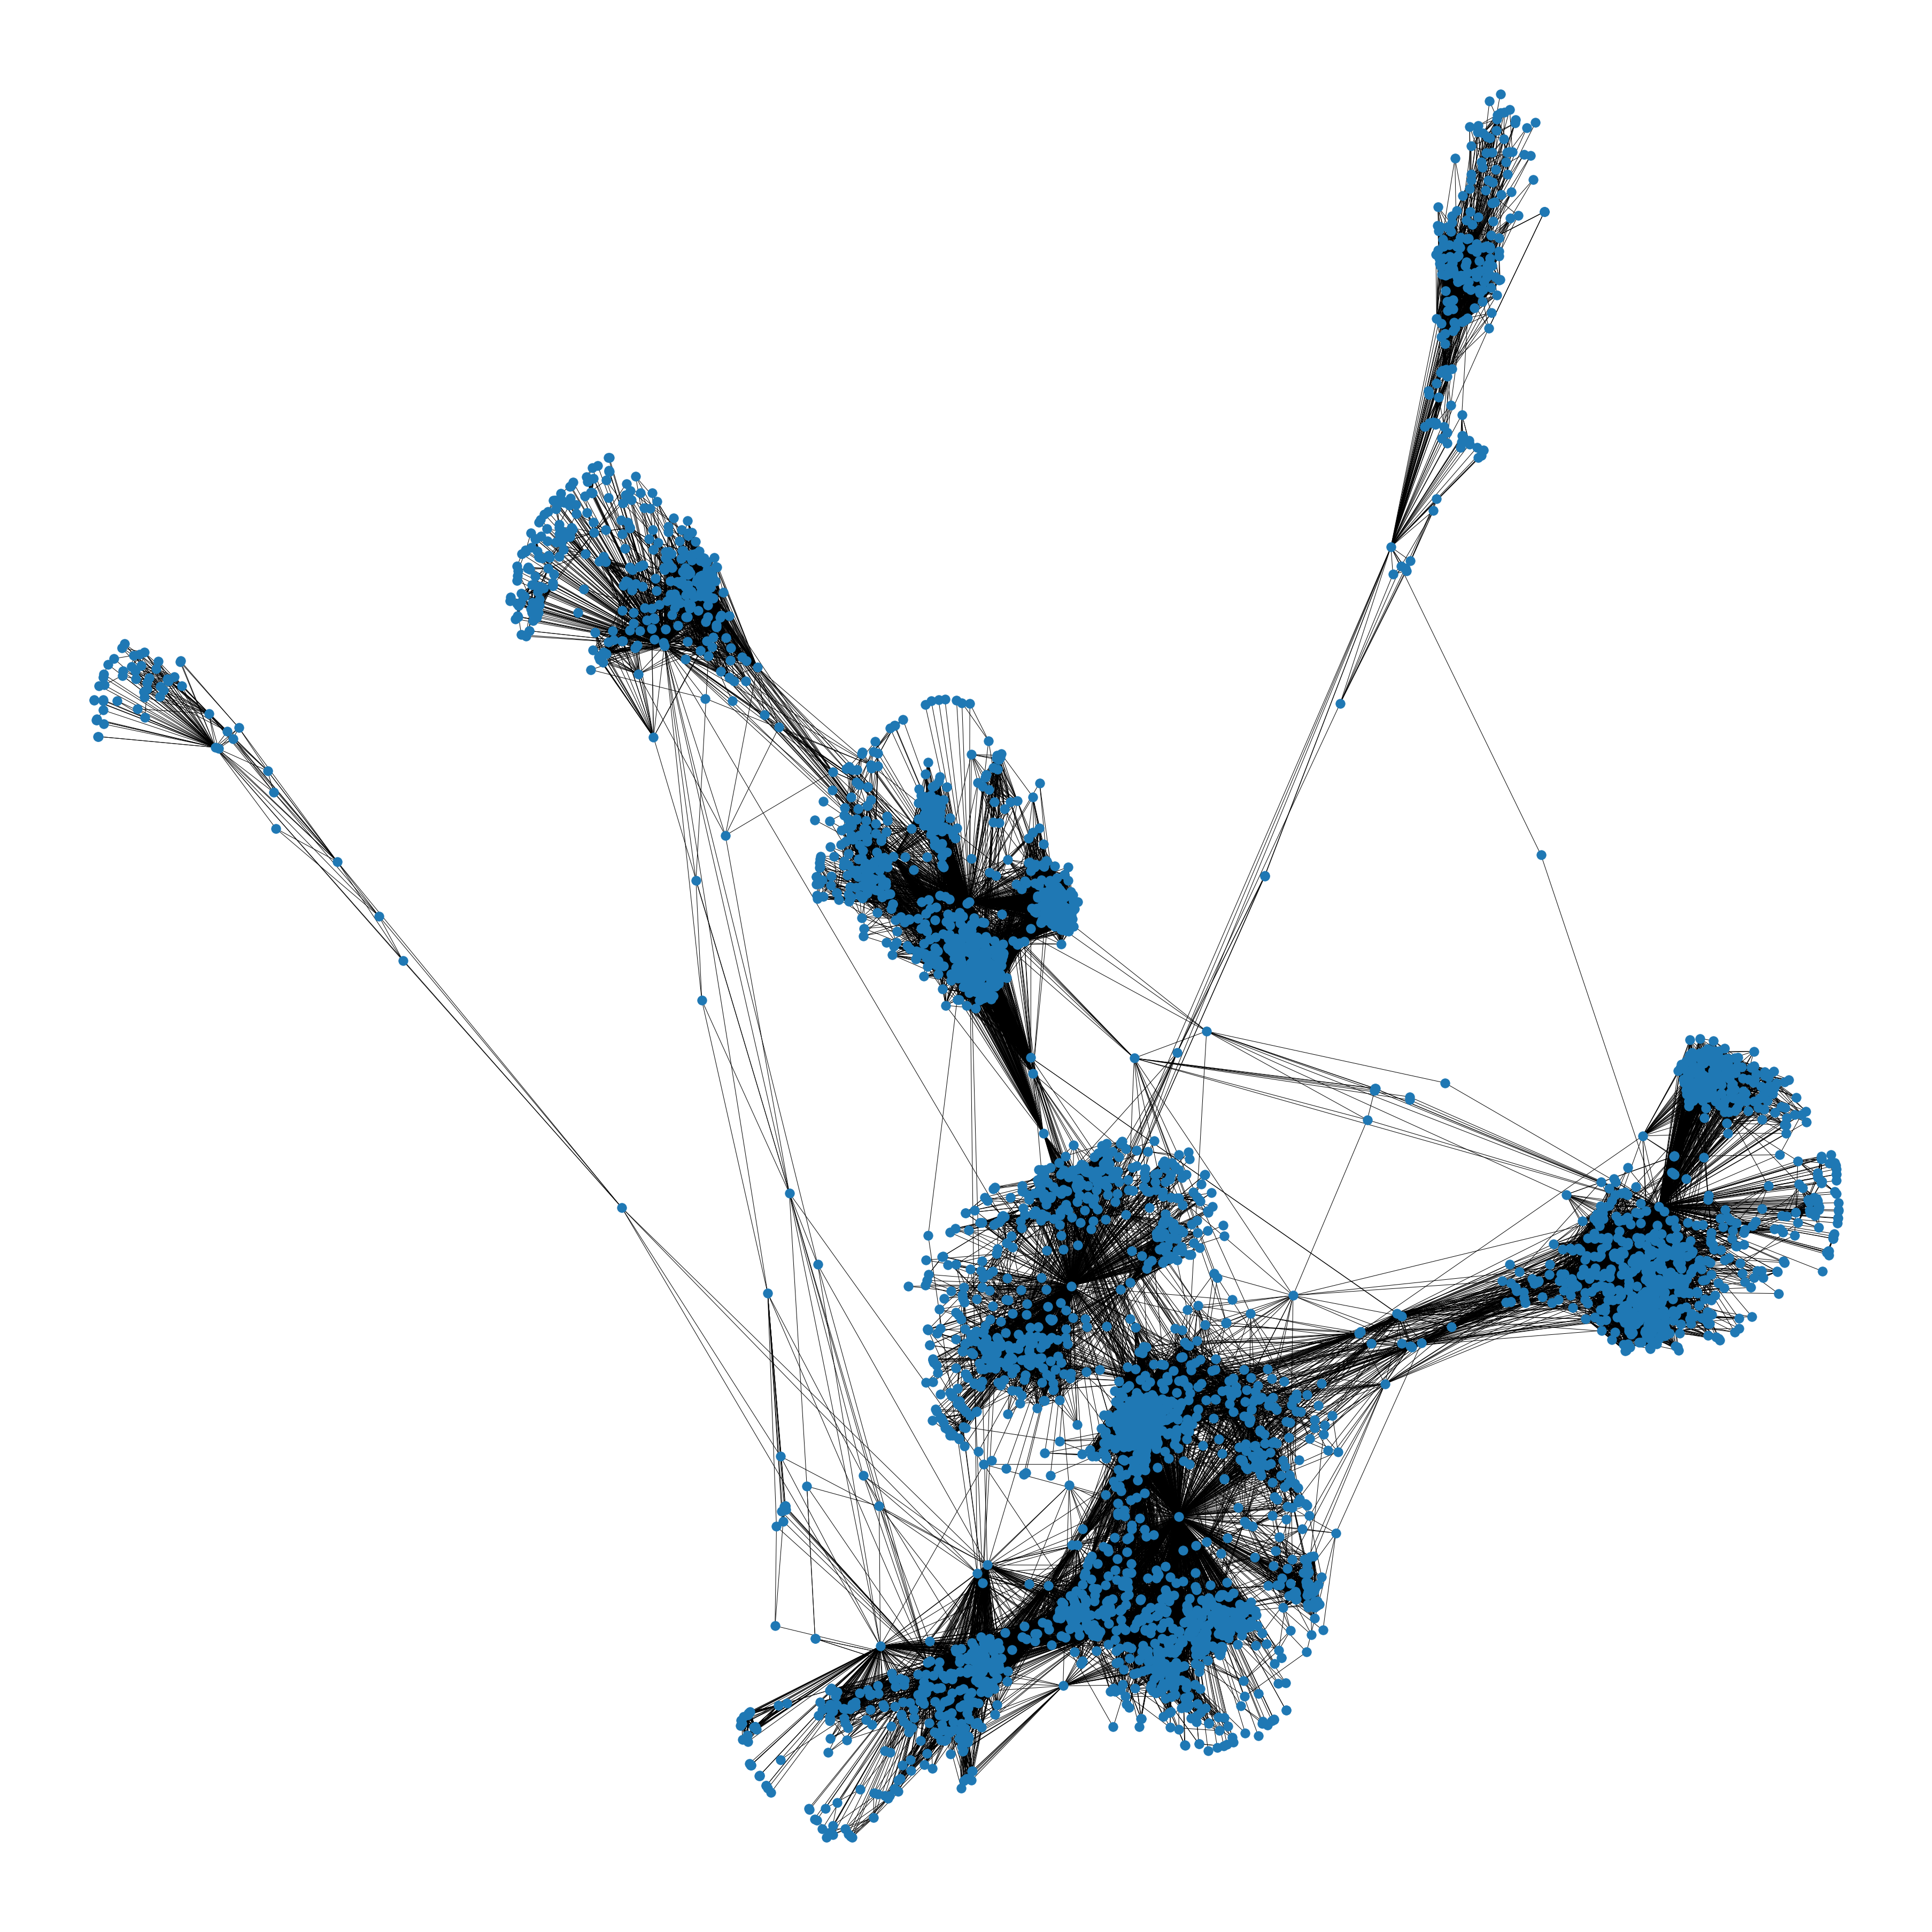

In [5]:
fig = plt.figure(figsize = (50,50))
pos = nx.spring_layout(G)
nx.draw(G, pos)
fig.show()
plt.savefig('save.png')

In [3]:
# adjacency_matrix = nx.adjacency_matrix(G)
# print(adjacency_matrix.todense())
# print(adjacency_matrix)
numpy_matrix = nx.to_numpy_matrix(G)
print(numpy_matrix)

np.savetxt('numpy_matrix.csv', numpy_matrix, delimiter=',', newline="\n", fmt='%d')

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
def get_node_degrees():
    df = pd.read_csv('numpy_matrix.csv', header = None)
    count = 0
    for i in range(df.shape[0]):
        row = df.iloc[i, :]
        row = pd.np.array(row)
        # print(row)
        for val in row:
            if val == 1:
                count = count + 1
    return count
get_node_degrees()

176468

           x         y  fit_curve         y_hat
0      347.0  0.000248          1  1.114593e-08
1     1045.0  0.000248          2  7.081892e-10
2      229.0  0.000248          3  3.150296e-08
3      792.0  0.000248          4  1.416208e-09
4      755.0  0.000248          5  1.596146e-09
...      ...       ...        ...           ...
1039     NaN       NaN       1040           NaN
1040     NaN       NaN       1041           NaN
1041     NaN       NaN       1042           NaN
1042     NaN       NaN       1043           NaN
1043     NaN       NaN       1044           NaN

[1044 rows x 4 columns]


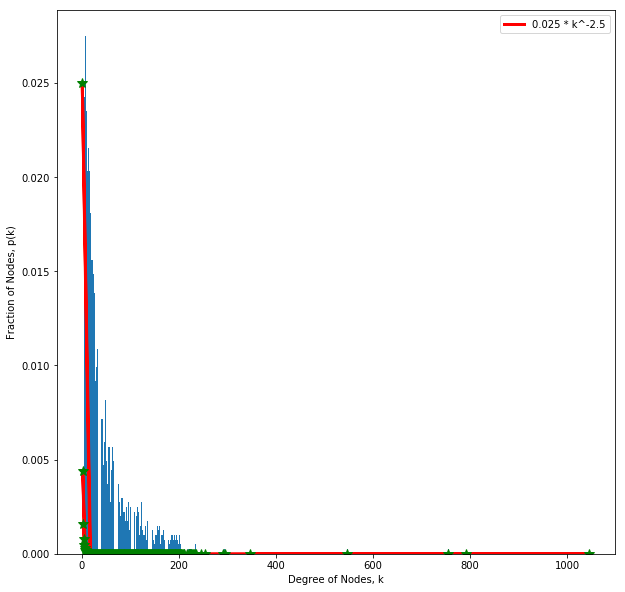

In [6]:
from scipy import optimize

                                               
def get_degree_distribution():

    degree_distribution = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degree_distribution:
            degree_distribution[degree] = 0
        degree_distribution[degree] += 1
    
    for k, v in degree_distribution.items():
        degree_distribution[k] = v / 4039
    
    fit_curve = []
    for i in range(max(degree_distribution.keys())):
        if (i != 0):
            fit_curve.append(i)
    fit_curve_df = pd.DataFrame(fit_curve, columns = ['fit_curve'])
    # print(degree_distribution)
    
    # p(k) = a * k^-r
    degree_distribution = {k: v for k, v in sorted(degree_distribution.items(), key=lambda item: item[1])}
    df = pd.DataFrame(list(degree_distribution.items()), columns = ['x', 'y'])
    df = pd.concat([df, fit_curve_df], axis=1)
    
    # a = 0.025
    # r = 2.5
    y_hat = (0.025 * df[['x']] **(-2.5))
    df.insert(loc = 3, value = y_hat, column = 'y_hat')
    print(df)
    
    plt.figure(figsize=(10,10))
    plt.bar(degree_distribution.keys(), degree_distribution.values())
    plt.plot(df[['x']], df[['y_hat']], lw = 3, color = 'red', label = '0.025 * k^-2.5')
    plt.plot(df[['x']], df[['y_hat']], r'g*', markersize = 10)
    plt.xlabel('Degree of Nodes, k')
    plt.ylabel('Fraction of Nodes, p(k)')
    plt.legend()
    plt.savefig('Q2_3.png')

get_degree_distribution()